<a href="https://colab.research.google.com/github/solankinitin1210/Capstone-Project-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

## <b> Problem Description </b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).


## <b> Data Description </b>

### <b>  The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>


### <b>Attribute Information: </b>

## Demographic
* ### Sex : male or female("M" or "F")
* ### Age: Age of the patient (Continuous)

## Behavioral
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ### Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(Continuous)
* ### BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* ### Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* ### Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* ### Diabetes: whether or not the patient had diabetes (Nominal)
* ### Tot Chol: total cholesterol level (Continuous)
* ### Sys BP: systolic blood pressure (Continuous)
* ### BMI: Body Mass Index (Continuous)
* ### Heart Rate: heart rate (Continuous)
* ### Glucose: glucose level (Continuous)

## Predict variable (desired target)
* ### 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)


In [158]:
!pip install eli5

In [159]:
# Importing the libraries for process data
import pandas as pd
import numpy as np
from numpy import math

# Import libraries for ploting data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

import eli5 as eli


In [160]:
# Mount driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
# Import CSV file from drive 
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project-3/data_cardiovascular_risk.csv')

In [162]:
# Let's check how our dataset look like
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [164]:
# Let's checke the null values for all the columns
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [165]:
# Let's check the statistics of columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


**Initial Observation**

## Clean the Dataset and Deal With the Null Values

### id & education column
- Id columns do not contain any useful information so it's not required for our analysis
- As we know that heart disease has relation to education, so the education column is again not required in analysis (even in the given PDF document this column is not mentioned)
- So let's drop both id and education columns

In [166]:
# droping the id and education column
df.drop(columns=['id','education'],inplace=True)

In [167]:
# Make function to plot distribution chart
def dist_chart(x):
  plt.figure(figsize = (20,40))
  plt.subplot(9,2,1)
  sns.distplot(x)
  plt.axvline(x.mean(), color='green', linestyle='dashed', linewidth=2)
  plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.subplot(9,2,2)
  sns.boxplot(x)
  plt.show()

### cigsPerDay

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


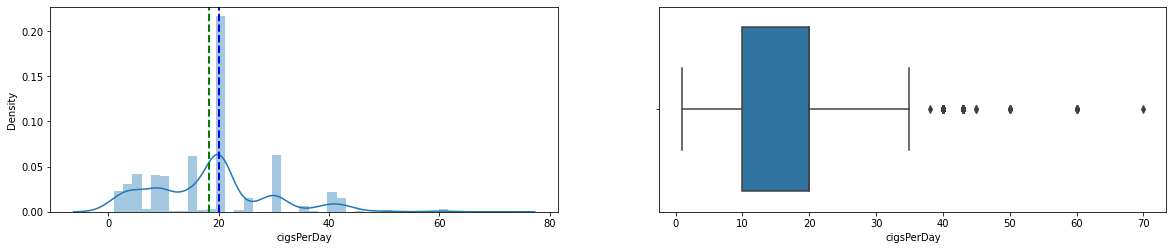

In [168]:
# Plot the Data distribution chart for column
dist_chart(df[df['is_smoking']=='YES'].cigsPerDay)

**Observation**
- From the chart, it's observed that Data is normally distributed (not counting the non-smoker's value as it's 0) 
- Mean and median values are close to each other
- From the box plot we can see that there are some outliers in data so for the safe side we'll replace null values with median  

In [169]:
# Fill the null values with median
df['cigsPerDay'].fillna(df[df['is_smoking']=='YES'].cigsPerDay.median(),inplace=True)

In [170]:
#Verify that filling done successfull
df[df['cigsPerDay'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### BPMeds


In [171]:
#Find the unique values in columns
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [172]:
# As this is is categorical columns (as it only contains 0 & 1) null value will be replace with the mode of the data
df['BPMeds'].fillna(float(df['BPMeds'].mode()),inplace=True)

In [173]:
#Verify that filling done successfull
df[df['BPMeds'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### totChol

In [174]:
#Find the unique values in columns
df['totChol'].unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


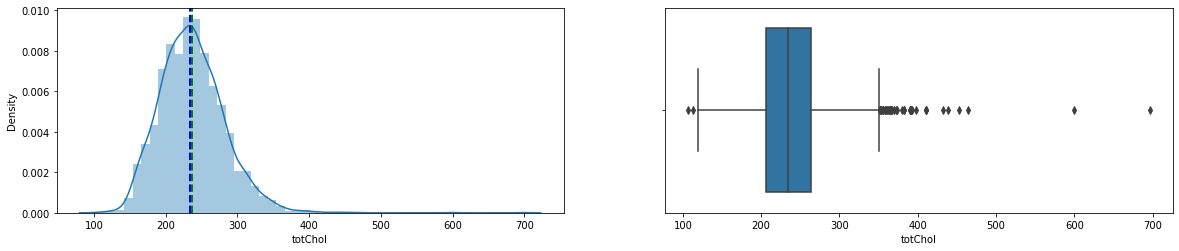

In [175]:
# Plot the Data distribution chart for column
dist_chart(df['totChol'])

**Observation**
- From the chart, it's observed that Data is normally distributed 
- Mean and median values are close to each other
- From the box plot we can see that there are some outliers in data so for the safe side we'll replace null values with median

In [176]:
df['totChol'].median()

234.0

In [177]:
# Fill the null values with median
df['totChol'].fillna(df['totChol'].median(),inplace=True)

In [178]:
#Verify that filling done successfull
df[df['totChol'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### BMI

In [179]:
df['BMI'].unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


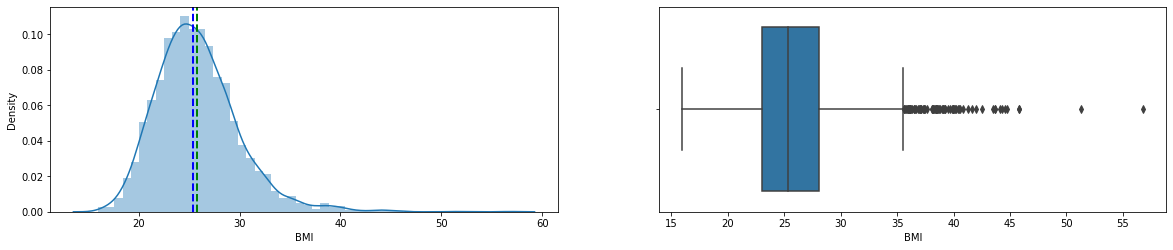

In [180]:
# Plot the Data distribution chart for column
dist_chart(df['BMI'])

**Observation**
- From the chart, it's observed that Data is normally distributed 
- Mean and median values are close to each other
- From the box plot we can see that there are many outliers in data so we'll replace null values with median

In [181]:
# Fill the null values with median
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [182]:
#Verify that filling done successfull
df[df['BMI'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### glucose

In [183]:
#Find the unique values in columns
df['glucose'].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


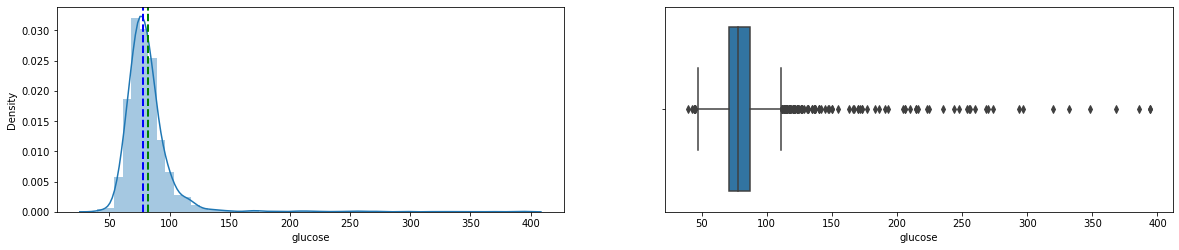

In [184]:
# Plot the Data distribution chart for column
dist_chart(df['glucose'])

**Observation**
- From the chart, it's observed that Data chart is positively skewed
- From the box plot we can see that there are many outliers in data so we'll replace null values with median

In [185]:
# Fill the null values with median
df['glucose'].fillna(df['glucose'].median(),inplace=True)

In [186]:
#Verify that filling done successfull
df[df['glucose'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### heartRate

In [187]:
#Find the unique values in columns
df['heartRate'].unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


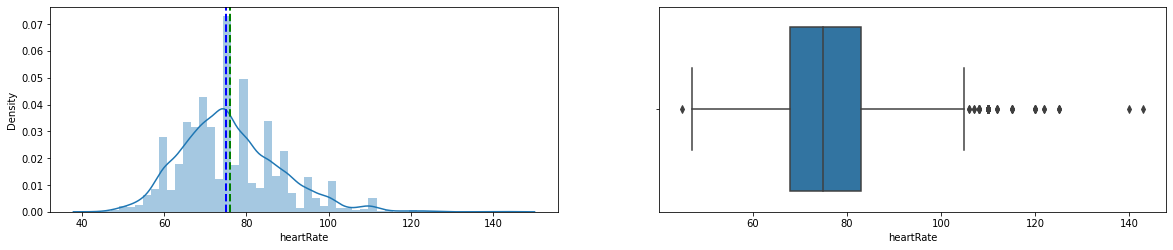

In [188]:
# Plot the Data distribution chart for column
dist_chart(df['heartRate'])

**Observation**
- From the chart, it's observed that Data chart is somewhat positively skewed
- From the box plot we can see that there are som outliers in data so we'll replace null values with median (There is only one null filed so it will not make effect much)

In [189]:
# Fill the null values with median
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)

In [190]:
#Verify that filling done successfull
df[df['heartRate'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### Let's verify there is no column with null values

In [191]:
# Let's checke the null values for all the columns
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Deal with outliers

In [192]:
def get_outlier (x):
  Q1 = np.percentile(x, 25, interpolation = 'midpoint')
  Q2 = np.percentile(x, 50, interpolation = 'midpoint')  
  Q3 = np.percentile(x, 75, interpolation = 'midpoint')

  IQR = Q3 - Q1
  print('Interquartile range is', IQR)
  low_lim = Q1 - 1.5 * IQR
  up_lim = Q3 + 1.5 * IQR
  print('low_limit is',low_lim)
  print('up_limit is', up_lim)
  outlier =[]
  for x in x:
      if ((x> up_lim) or (x<low_lim)):
          outlier.append(x)
  print('outlier in the dataset is', outlier)
  return up_lim,low_lim,outlier

### cigsPerDay

In [193]:
up_lim,low_lim,outlier=get_outlier(df.loc[df.cigsPerDay>0,'cigsPerDay'])


Interquartile range is 10.0
low_limit is -5.0
up_limit is 35.0
outlier in the dataset is [40.0, 60.0, 60.0, 40.0, 43.0, 40.0, 43.0, 50.0, 40.0, 50.0, 45.0, 40.0, 45.0, 43.0, 40.0, 43.0, 40.0, 43.0, 40.0, 60.0, 43.0, 40.0, 40.0, 40.0, 40.0, 40.0, 43.0, 40.0, 40.0, 40.0, 50.0, 40.0, 40.0, 43.0, 40.0, 43.0, 60.0, 43.0, 43.0, 43.0, 40.0, 43.0, 40.0, 40.0, 40.0, 40.0, 43.0, 40.0, 50.0, 43.0, 43.0, 40.0, 40.0, 40.0, 40.0, 43.0, 43.0, 40.0, 40.0, 43.0, 43.0, 40.0, 40.0, 40.0, 40.0, 43.0, 40.0, 40.0, 40.0, 40.0, 43.0, 40.0, 40.0, 60.0, 40.0, 50.0, 40.0, 43.0, 40.0, 40.0, 60.0, 40.0, 40.0, 43.0, 43.0, 40.0, 43.0, 43.0, 60.0, 50.0, 40.0, 43.0, 43.0, 43.0, 40.0, 43.0, 40.0, 40.0, 40.0, 43.0, 40.0, 40.0, 40.0, 43.0, 43.0, 43.0, 43.0, 40.0, 70.0, 43.0, 43.0, 43.0, 40.0, 40.0, 40.0, 43.0, 40.0, 38.0, 40.0, 43.0, 43.0, 60.0]


In [194]:
df.loc[df.cigsPerDay > up_lim,'cigsPerDay']=up_lim

### Heartrate

In [195]:
up_lim,low_lim,outlier=get_outlier(df['heartRate'])

Interquartile range is 15.0
low_limit is 45.5
up_limit is 105.5
outlier in the dataset is [110.0, 110.0, 110.0, 112.0, 110.0, 120.0, 110.0, 110.0, 106.0, 110.0, 110.0, 115.0, 110.0, 107.0, 110.0, 143.0, 110.0, 110.0, 112.0, 110.0, 107.0, 45.0, 110.0, 120.0, 108.0, 115.0, 110.0, 108.0, 110.0, 110.0, 110.0, 125.0, 125.0, 120.0, 115.0, 125.0, 110.0, 122.0, 110.0, 110.0, 122.0, 110.0, 106.0, 110.0, 120.0, 110.0, 140.0, 108.0, 115.0, 120.0, 110.0, 110.0, 108.0, 110.0, 108.0, 110.0, 108.0, 110.0, 110.0, 112.0, 108.0, 110.0, 110.0, 110.0]


In [196]:
df.loc[df.heartRate > up_lim,'heartRate']=up_lim
df.loc[df.heartRate < low_lim,'heartRate']=low_lim

### glucose

In [197]:
up_lim,low_lim,outlier=get_outlier(df['glucose'])

Interquartile range is 13.0
low_limit is 52.5
up_limit is 104.5
outlier in the dataset is [132.0, 105.0, 170.0, 107.0, 177.0, 118.0, 120.0, 173.0, 163.0, 205.0, 115.0, 120.0, 268.0, 137.0, 106.0, 348.0, 110.0, 120.0, 115.0, 106.0, 122.0, 108.0, 255.0, 140.0, 105.0, 124.0, 244.0, 106.0, 115.0, 294.0, 112.0, 113.0, 254.0, 132.0, 116.0, 52.0, 50.0, 120.0, 110.0, 114.0, 127.0, 140.0, 113.0, 135.0, 45.0, 206.0, 140.0, 105.0, 105.0, 105.0, 117.0, 112.0, 107.0, 126.0, 113.0, 45.0, 131.0, 113.0, 114.0, 116.0, 394.0, 116.0, 120.0, 107.0, 123.0, 114.0, 118.0, 270.0, 107.0, 320.0, 129.0, 112.0, 107.0, 115.0, 142.0, 106.0, 112.0, 107.0, 120.0, 52.0, 235.0, 116.0, 115.0, 40.0, 126.0, 117.0, 118.0, 150.0, 120.0, 136.0, 113.0, 107.0, 118.0, 112.0, 191.0, 117.0, 44.0, 394.0, 124.0, 173.0, 127.0, 50.0, 119.0, 117.0, 109.0, 113.0, 105.0, 108.0, 110.0, 112.0, 121.0, 43.0, 117.0, 108.0, 256.0, 113.0, 145.0, 113.0, 105.0, 117.0, 47.0, 297.0, 118.0, 166.0, 172.0, 48.0, 132.0, 111.0, 106.0, 107.0, 113.0, 115

In [198]:
df.loc[df.heartRate > up_lim,'glucose']=up_lim
df.loc[df.heartRate < low_lim,'glucose']=low_lim

### BMI

In [199]:
up_lim,low_lim,outlier=get_outlier(df['BMI'])

Interquartile range is 4.964999999999996
low_limit is 15.582500000000007
up_limit is 35.442499999999995
outlier in the dataset is [35.58, 43.69, 36.54, 35.96, 35.62, 38.42, 36.11, 38.14, 44.09, 35.99, 39.94, 39.82, 40.21, 38.96, 38.53, 37.38, 39.69, 35.85, 38.54, 37.1, 39.94, 36.07, 35.78, 38.43, 51.28, 41.29, 35.45, 36.91, 38.31, 56.8, 39.21, 38.11, 36.65, 39.04, 35.68, 44.27, 39.17, 38.75, 45.79, 36.81, 38.46, 36.21, 37.48, 36.52, 40.38, 36.62, 37.15, 38.82, 35.53, 42.0, 43.48, 37.04, 37.62, 40.58, 39.22, 37.02, 36.12, 42.53, 38.17, 40.08, 37.41, 37.3, 40.11, 40.81, 39.53, 40.52, 36.18, 39.08, 44.55, 39.91, 38.39, 36.01, 41.61, 44.71, 43.67, 45.8, 38.61, 36.29, 38.06]


In [200]:
df.loc[df.heartRate > up_lim,'BMI']=up_lim
df.loc[df.heartRate < low_lim,'BMI']=low_lim

### sysBP

In [201]:
up_lim,low_lim,outlier=get_outlier(df['sysBP'])

Interquartile range is 27.0
low_limit is 76.5
up_limit is 184.5
outlier in the dataset is [232.0, 185.0, 186.5, 193.0, 192.0, 207.0, 202.0, 244.0, 186.0, 191.0, 191.5, 193.0, 195.0, 185.5, 190.0, 212.0, 210.0, 202.5, 215.0, 196.0, 248.0, 215.0, 195.0, 208.0, 194.0, 204.0, 186.0, 188.0, 214.0, 188.5, 187.0, 192.5, 197.0, 185.0, 197.0, 190.0, 186.5, 190.0, 196.0, 230.0, 187.0, 185.0, 205.0, 205.0, 200.0, 199.0, 185.0, 210.0, 189.0, 200.0, 191.0, 198.0, 200.0, 193.0, 200.0, 209.0, 195.0, 199.0, 189.0, 295.0, 235.0, 204.0, 188.0, 195.0, 198.0, 197.5, 190.0, 199.0, 188.0, 206.0, 215.0, 210.0, 243.0, 205.5, 192.5, 193.0, 189.0, 192.0, 189.0, 187.0, 187.5, 206.0, 191.0, 206.0, 196.0, 185.0, 195.0, 196.0, 195.0, 190.0, 220.0, 217.0, 189.0, 185.0, 213.0, 188.0, 190.0, 185.0, 220.0, 192.5, 213.0, 210.0, 207.5, 197.5, 187.0]


In [202]:
df.loc[df.heartRate > up_lim,'sysBP']=up_lim
df.loc[df.heartRate < low_lim,'sysBP']=low_lim

### totChol

In [203]:
up_lim,low_lim,outlier=get_outlier(df['totChol'])

Interquartile range is 58.0
low_limit is 119.0
up_limit is 351.0
outlier in the dataset is [382.0, 391.0, 439.0, 600.0, 356.0, 696.0, 361.0, 382.0, 464.0, 391.0, 362.0, 390.0, 360.0, 352.0, 366.0, 366.0, 370.0, 372.0, 365.0, 113.0, 392.0, 353.0, 367.0, 390.0, 398.0, 453.0, 358.0, 363.0, 107.0, 352.0, 354.0, 373.0, 410.0, 380.0, 366.0, 432.0, 410.0, 358.0, 355.0, 364.0, 352.0, 410.0, 352.0]


In [204]:
df.loc[df.heartRate > up_lim,'totChol']=up_lim
df.loc[df.heartRate < low_lim,'totChol']=low_lim

## Let's Start Our EDA

In [205]:
#Define Function
def Catergory_Analysis(z):
  print('***Total unique values contain by column***')
  display(df[z].unique())
  y=df.groupby(z).agg({'age':'count', 'TenYearCHD': 'sum'}).reset_index().rename(columns={'age':'Total_Patient','TenYearCHD':'TenYearCHD_Patient'})
  y['CHD_Risk(%)']=round(y['TenYearCHD_Patient']/y['Total_Patient']*100,2)
  y['No_Risk(%)']=round((y['Total_Patient']-y['TenYearCHD_Patient'])/y['Total_Patient']*100,2)
  print(f'\n ***{z} Analysis Table*** \n')
  display(y)
  print('\n ***Plot Percentage Chart*** \n')
  #display(y[[z,'risk per']])
  plt.figure(figsize = (20,40))
  y.plot.bar(x=z,y=['CHD_Risk(%)','No_Risk(%)'])

In [206]:
def conti_Analysis(c):
  d=df.groupby(c)['TenYearCHD'].sum().reset_index().sort_values(by='TenYearCHD',ascending=False)
  plt.figure(figsize = (20,5))
  sns.lineplot(data=d,x=c,y='TenYearCHD')
  plt.show()


### Gender wise EDA


***Total unique values contain by column***


array(['F', 'M'], dtype=object)


 ***sex Analysis Table*** 



,sex,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,F,1923,239,12.43,87.57
1,M,1467,272,18.54,81.46



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

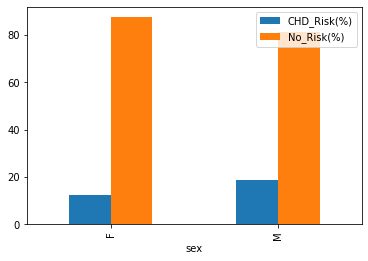

In [207]:
#Call Analysis function for 'sex' variable
Catergory_Analysis('sex')

### Smoker wise Analysis

***Total unique values contain by column***


array(['YES', 'NO'], dtype=object)


 ***is_smoking Analysis Table*** 



,is_smoking,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,NO,1703,236,13.86,86.14
1,YES,1687,275,16.30,83.70



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

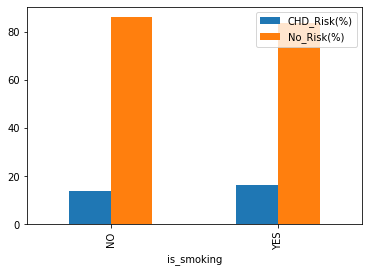

In [208]:
#Call Analysis function for 'is_smoking' variable
Catergory_Analysis('is_smoking')

### diabetes wise Analysis

***Total unique values contain by column***


array([0, 1])


 ***diabetes Analysis Table*** 



,diabetes,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,3303,478,14.47,85.53
1,1,87,33,37.93,62.07



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

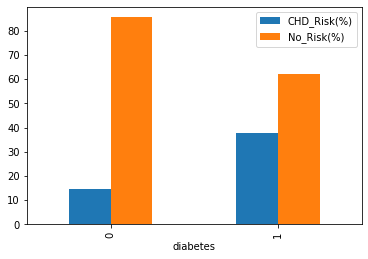

In [209]:
#Call Analysis function for 'diabetes' variable
Catergory_Analysis('diabetes')

### BPMeds wise Analysis

***Total unique values contain by column***


array([0., 1.])


 ***BPMeds Analysis Table*** 



,BPMeds,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0.0,3290,478,14.53,85.47
1,1.0,100,33,33.00,67.00



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

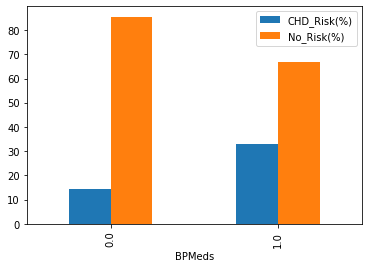

In [210]:
#Call Analysis function for 'BPMeds' variable
Catergory_Analysis('BPMeds')

### prevalentStroke wise Analysis

***Total unique values contain by column***


array([0, 1])


 ***prevalentStroke Analysis Table*** 



,prevalentStroke,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,3368,501,14.88,85.12
1,1,22,10,45.45,54.55



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

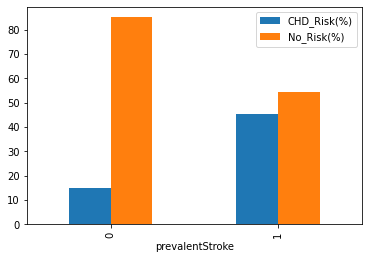

In [211]:
#Call Analysis function for 'prevalentStroke' variable
Catergory_Analysis('prevalentStroke')

### prevalentHyp wise analysis variable

***Total unique values contain by column***


array([0, 1])


 ***prevalentHyp Analysis Table*** 



,prevalentHyp,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,2321,256,11.03,88.97
1,1,1069,255,23.85,76.15



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

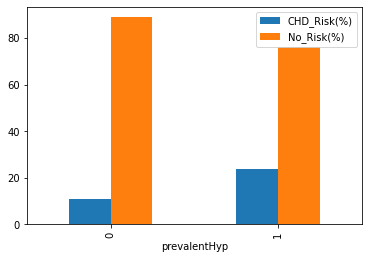

In [212]:
#Call Analysis function for 'prevalentStroke' variable
Catergory_Analysis('prevalentHyp')

### diabetes wise analysis variable

***Total unique values contain by column***


array([0, 1])


 ***diabetes Analysis Table*** 



,diabetes,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,3303,478,14.47,85.53
1,1,87,33,37.93,62.07



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

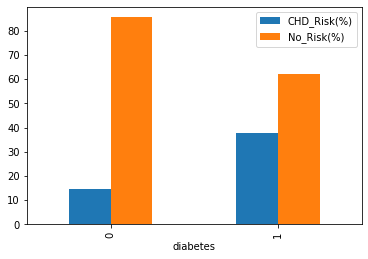

In [213]:
#Call Analysis function for 'diabetes' variable
Catergory_Analysis('diabetes')

### Age wise Analysis

In [214]:
Age_wise=df.groupby('age')['TenYearCHD'].mean().reset_index().sort_values(by='TenYearCHD',ascending=False)
Age_wise

,age,TenYearCHD
38,70,0.500000
36,68,0.500000
34,66,0.466667
33,65,0.372093
35,67,0.333333
31,63,0.301075
28,60,0.252632
30,62,0.250000
26,58,0.242105
29,61,0.241379


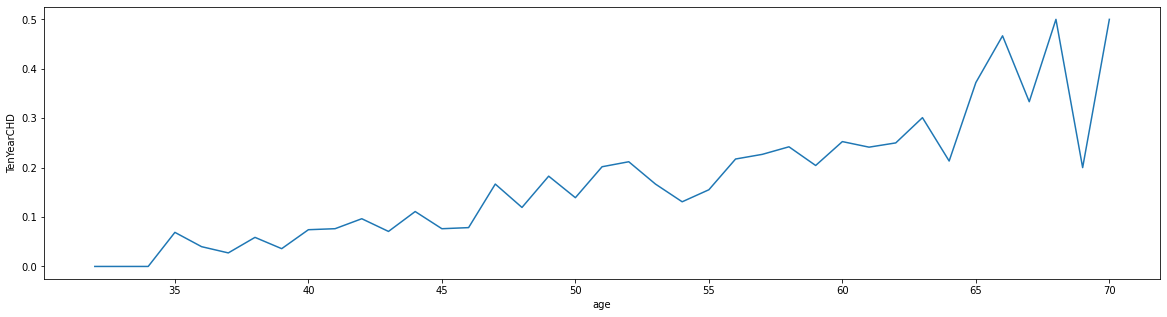

In [215]:
plt.figure(figsize = (20,5))
sns.lineplot(data=Age_wise,x='age',y='TenYearCHD')
plt.show()

In [216]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,119.0,148.0,85.0,35.4425,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,119.0,76.5,98.0,35.4425,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,119.0,116.0,71.0,35.4425,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,119.0,76.5,88.0,35.4425,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,119.0,76.5,85.0,35.4425,70.0,77.0,0


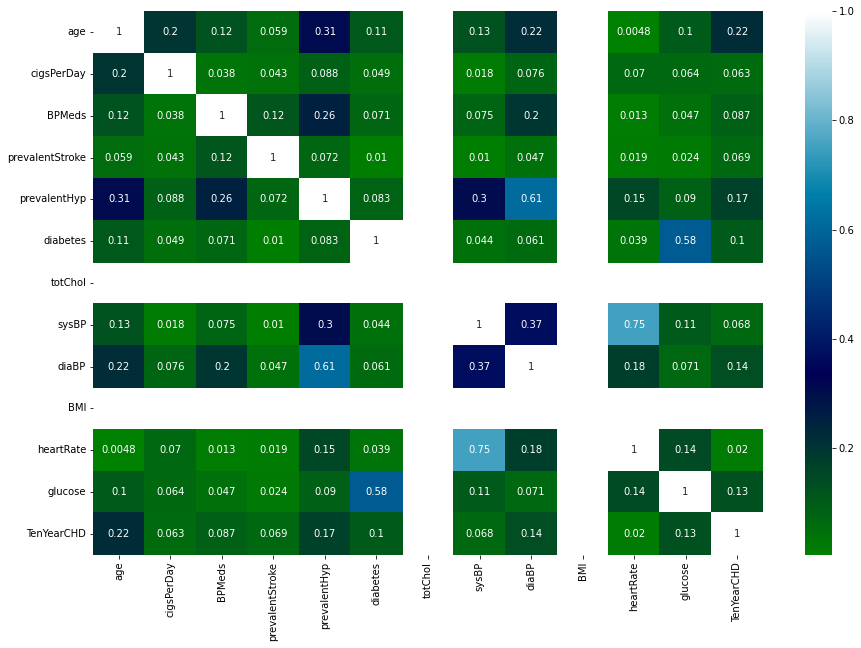

In [219]:
# Heatmap of correlation
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()),cmap='ocean',annot=True)

##<b> Prepare Data for algoritmes

In [59]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### **One hot coding for Categoric variable**

In [60]:
df=pd.get_dummies(df,columns=['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes'])

In [61]:
df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,...,is_smoking_NO,is_smoking_YES,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,64,3.0,119.0,148.0,85.0,35.4425,90.0,80.0,1,1,...,0,1,1,0,1,0,1,0,1,0
1,36,0.0,119.0,76.5,98.0,35.4425,72.0,75.0,0,0,...,1,0,1,0,1,0,0,1,1,0
2,46,10.0,119.0,116.0,71.0,35.4425,88.0,94.0,0,1,...,0,1,1,0,1,0,1,0,1,0
3,50,20.0,119.0,76.5,88.0,35.4425,68.0,94.0,1,0,...,0,1,1,0,1,0,0,1,1,0
4,64,30.0,119.0,76.5,85.0,35.4425,70.0,77.0,0,1,...,0,1,1,0,1,0,1,0,1,0


In [62]:
x =df.drop(columns=['TenYearCHD'])
y =df['TenYearCHD']

### **Over sampling using smote**

In [63]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [64]:
X_train,x_test,Y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.25,random_state=0)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [67]:
def get_metrics(Y_train,y_train_pred,y_test,y_test_pred):
  
  
  train_accuracy=accuracy_score(Y_train, y_train_pred)
  train_precision = precision_score(Y_train, y_train_pred)
  train_recall = recall_score(Y_train, y_train_pred)
  train_f1 = f1_score(Y_train, y_train_pred)
  train_roc = roc_auc_score(Y_train, y_train_pred)
    
  print('**** Train Dataset Score ****')
  print('train_accuracy {}'.format(train_accuracy))
  print('train_precision is {}'.format(train_precision))
  print('train_recall is {}'.format(train_recall))
  print('train_f1 is {}'.format(train_f1))
  print('train_roc is {}'.format(train_roc))
  
 
  test_accuracy=accuracy_score(y_test, y_test_pred)
  test_precision = precision_score(y_test, y_test_pred)
  test_recall = recall_score(y_test, y_test_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  test_roc = roc_auc_score(y_test, y_test_pred)

  print('\n**** Test Dataset Score ****')
  print('test_accuracy is {}'.format(test_accuracy))
  print('test_precision is {}'.format(test_precision))
  print('test_recall is {}'.format(test_recall))
  print('test_f1 is {}'.format(test_f1))
  print('test_roc is {}'.format(test_roc))

  print('\n**** Confusion Matrix on train set ****')
  cm = confusion_matrix(y_test, y_test_pred)
  sns.heatmap(cm,annot = True, fmt = "d")
  plt.show()
  
  print('\n**** Plot ROC-AUC Curve ****')
  # plt.figure(figsize=(20,6))
  # plt.plot((y_test_pred**2)[:100])
  # plt.plot(np.array(y_test**2)[:100])
  # plt.legend(["Predicted","Actual"])
  # plt.show()


  fpr, tpr, _ = roc_curve(y_test, y_test_pred)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

  return test_accuracy,test_precision,test_recall,test_f1,test_roc

In [ ]:
def eli5_explainability(model,row_number) :
  z=pd.DataFrame(x_test)
  return eli.show_prediction(model, np.array(z.iloc[row_number]),
                    feature_names=x.columns.values,
                    show_feature_values=True)

In [68]:
score_board={}

## Logistic Regression

In [69]:
Log_para = {'C': [10],#0.001,0.01,0.1,1,100,1000
                       'penalty':['l2','l1', 'elasticnet','None'],
                       'class_weight':['balanced']#,'dict'
            }

In [70]:
logistic = GridSearchCV(LogisticRegression(),param_grid=Log_para,cv=5,verbose=True,scoring='recall',n_jobs=-1)

In [71]:
logistic.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10], 'class_weight': ['balanced'],
                         'penalty': ['l2', 'l1', 'elasticnet', 'None']},
             scoring='recall', verbose=True)

In [72]:
lr_best=logistic.best_estimator_
lr_best

LogisticRegression(C=10, class_weight='balanced')

In [73]:
y_train_pred=logistic.predict(X_train)
y_test_pred=logistic.predict(x_test)

**** Train Dataset Score ****
train_accuracy 0.7948124131542381
train_precision is 0.8924528301886793
train_recall is 0.6649484536082474
train_f1 is 0.7620837808807733
train_roc is 0.793325875155772

**** Test Dataset Score ****
test_accuracy is 0.7756944444444445
test_precision is 0.8907407407407407
test_recall is 0.6456375838926175
test_f1 is 0.7486381322957198
test_roc is 0.7803727487808412

**** Confusion Matrix on train set ****


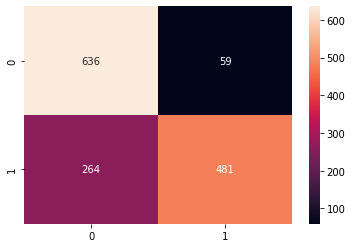


**** Plot ROC-AUC Curve ****


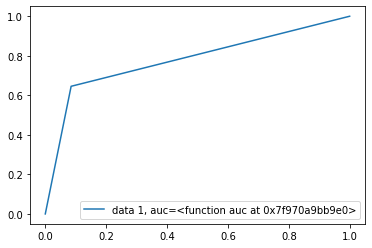

In [74]:
accuracy,precision,recall,f1,roc=get_metrics(Y_train,y_train_pred,y_test,y_test_pred)

In [75]:
score_board['Logistic']={'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1,'Roc_Score':roc}

## SVC

In [76]:
svc_pera={'C': [100],#0.1, 1, 10, 
          'kernel': ['poly'] #'rbf','linear', 'sigmoid'
          }

In [77]:
svm = GridSearchCV(SVC(),param_grid=svc_pera,cv=5,verbose=True,scoring='recall',n_jobs=-1)
svm.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100], 'kernel': ['poly']}, scoring='recall',
             verbose=True)

In [78]:
svm_best=svm.best_estimator_
svm_best

SVC(C=100, kernel='poly')

In [79]:
y_train_pred=svm.predict(X_train)
y_test_pred=svm.predict(x_test)

**** Train Dataset Score ****
train_accuracy 0.8408985641500695
train_precision is 0.9113132461625923
train_recall is 0.7511715089034676
train_f1 is 0.8235294117647058
train_roc is 0.8398714687374482

**** Test Dataset Score ****
test_accuracy is 0.7847222222222222
test_precision is 0.864321608040201
test_recall is 0.6926174496644295
test_f1 is 0.7690014903129656
test_roc is 0.7880353435372507

**** Confusion Matrix on train set ****


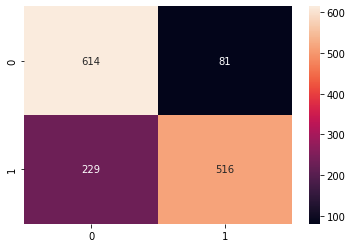


**** Plot ROC-AUC Curve ****


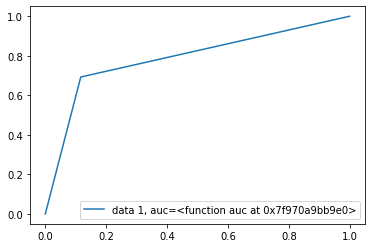

In [80]:
accuracy,precision,recall,f1,roc=get_metrics(Y_train,y_train_pred,y_test,y_test_pred)

In [81]:
score_board['SVM']={'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1,'Roc_Score':roc}

## K Nearest Neighbour

In [82]:
knn_params = {
    'n_neighbors':[12],#2,4,6,8,10,15,20
    'weights':['distance'],# 'uniform' 
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[20]#15,10,30,40,50,60,70]
}

In [83]:
# using grid search cv for hyperparameter tuning
knn = GridSearchCV(KNeighborsClassifier(),param_grid=knn_params,cv=5,scoring='recall',verbose=True,n_jobs=-1)

In [84]:
knn.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20], 'n_neighbors': [12],
                         'weights': ['distance']},
             scoring='recall', verbose=True)

In [85]:
knn_best=knn.best_estimator_
knn_best

KNeighborsClassifier(leaf_size=20, n_neighbors=12, weights='distance')

In [86]:
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(x_test)

**** Train Dataset Score ****
train_accuracy 1.0
train_precision is 1.0
train_recall is 1.0
train_f1 is 1.0
train_roc is 1.0

**** Test Dataset Score ****
test_accuracy is 0.8513888888888889
test_precision is 0.8544726301735648
test_recall is 0.8590604026845637
test_f1 is 0.8567603748326639
test_roc is 0.8511129351552316

**** Confusion Matrix on train set ****


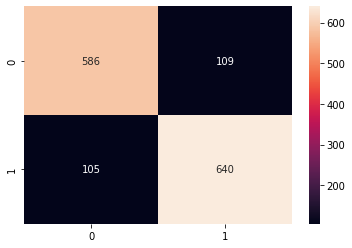


**** Plot ROC-AUC Curve ****


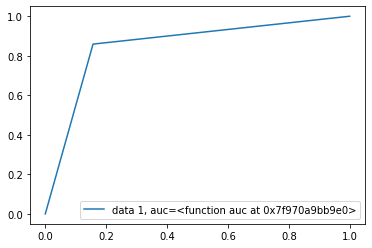

In [87]:
accuracy,precision,recall,f1,roc=get_metrics(Y_train,y_train_pred,y_test,y_test_pred)

In [88]:
score_board['KNN']={'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1,'Roc_Score':roc}

##<b> Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
# parameter for Gradient Boosting
gb_params = {
    'max_depth': [17], #10,15,20,25],
    'learning_rate': [1.0],#0.005,0.001,0.01,0.1,
    'min_samples_leaf':[25],#20,15,20
    'min_samples_split':[55] #60,70,65,50,
  }

In [91]:
Grad_boost = GridSearchCV(GradientBoostingClassifier(),gb_params,cv=2,scoring='recall',verbose=4,n_jobs=-1)

In [92]:
Grad_boost.fit(X_train,Y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0], 'max_depth': [17],
                         'min_samples_leaf': [25], 'min_samples_split': [55]},
             scoring='recall', verbose=4)

In [93]:
gb_best=Grad_boost.best_estimator_
gb_best

GradientBoostingClassifier(learning_rate=1.0, max_depth=17, min_samples_leaf=25,
                           min_samples_split=55)

In [94]:
y_train_pred=Grad_boost.predict(X_train)
y_test_pred=Grad_boost.predict(x_test)

**** Train Dataset Score ****
train_accuracy 1.0
train_precision is 1.0
train_recall is 1.0
train_f1 is 1.0
train_roc is 1.0

**** Test Dataset Score ****
test_accuracy is 0.8743055555555556
test_precision is 0.8971830985915493
test_recall is 0.8550335570469799
test_f1 is 0.8756013745704467
test_roc is 0.8749987929119791

**** Confusion Matrix on train set ****


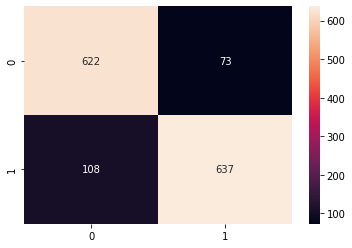


**** Plot ROC-AUC Curve ****


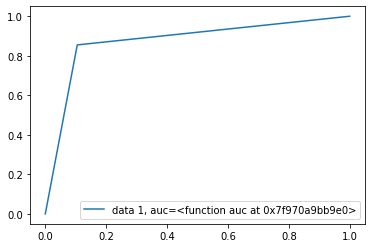

In [95]:
accuracy,precision,recall,f1,roc=get_metrics(Y_train,y_train_pred,y_test,y_test_pred)

In [96]:
score_board['Grad_boost']={'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1,'Roc_Score':roc}

## **XG Boosting**

In [97]:
# parameters for Extreme Gradient Boosting
xgb_params = {
          'n_estimators': [1500],#,2000,1000,200,50 
          'max_depth': [15],#2,4,8,10,20 
          'learning_rate': [0.06], #0.02,0.04, 
          'colsample_bytree': [1.0],#0.7,0.5,1.5
          'subsample': [0.7],#0.5,0.3, 
          'n_thread': [4],#2,6
          }

In [98]:
xgb= GridSearchCV(XGBClassifier(),param_grid=xgb_params,scoring='recall',cv=5,n_jobs=-1)

In [99]:
xgb.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [1.0], 'learning_rate': [0.06],
                         'max_depth': [15], 'n_estimators': [1500],
                         'n_thread': [4], 'subsample': [0.7]},
             scoring='recall')

In [100]:
xgb_best=xgb.best_estimator_
xgb_best

XGBClassifier(colsample_bytree=1.0, learning_rate=0.06, max_depth=15,
              n_estimators=1500, n_thread=4, subsample=0.7)

In [101]:
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(x_test)

**** Train Dataset Score ****
train_accuracy 1.0
train_precision is 1.0
train_recall is 1.0
train_f1 is 1.0
train_roc is 1.0

**** Test Dataset Score ****
test_accuracy is 0.8833333333333333
test_precision is 0.9115549215406562
test_recall is 0.8577181208053691
test_f1 is 0.8838174273858921
test_roc is 0.884254743855922

**** Confusion Matrix on train set ****


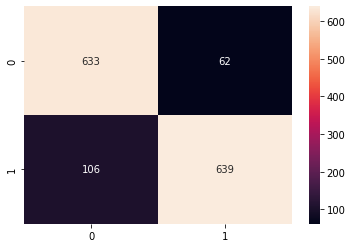


**** Plot ROC-AUC Curve ****


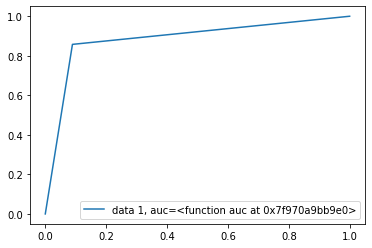

In [102]:
accuracy,precision,recall,f1,roc=get_metrics(Y_train,y_train_pred,y_test,y_test_pred)

In [103]:
score_board['XGB']={'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1,'Roc_Score':roc}

## **Random Forest**

In [104]:
rf_params = { 'n_estimators': [200], #,50,1000,1500
              'criterion':['entropy'],#'gini'],
              'min_samples_leaf':[5],#,6,10,30
              'max_depth' : [100],#50,20,30,7,80,150,200,250
              'min_samples_split': [10], #15,20,30
              'max_features':['sqrt',]
              }

In [105]:
rf_grid = GridSearchCV(RandomForestClassifier(),rf_params,cv=5,scoring='recall',verbose=True,n_jobs=-1)

In [106]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [100],
                         'max_features': ['sqrt'], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [200]},
             scoring='recall', verbose=True)

In [107]:
rf_best=rf_grid.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200)

In [108]:
y_train_pred=rf_grid.predict(X_train)
y_test_pred=rf_grid.predict(x_test)

**** Train Dataset Score ****
train_accuracy 0.9196387216303844
train_precision is 0.967556253270539
train_recall is 0.866447985004686
train_f1 is 0.9142150803461062
train_roc is 0.9190298533082037

**** Test Dataset Score ****
test_accuracy is 0.84375
test_precision is 0.9012345679012346
test_recall is 0.7838926174496644
test_f1 is 0.838478104809763
test_roc is 0.8459031432572064

**** Confusion Matrix on train set ****


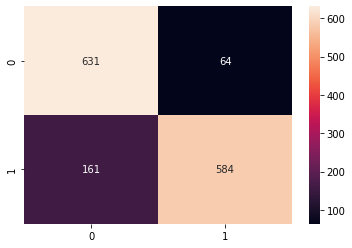


**** Plot ROC-AUC Curve ****


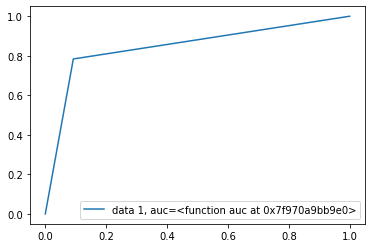

In [109]:
accuracy,precision,recall,f1,roc=get_metrics(Y_train,y_train_pred,y_test,y_test_pred)

In [110]:
score_board['Random_Forest']={'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1,'Roc_Score':roc}

In [156]:
eli5_explainability(rf_grid.best_estimator_,2)

## **Decision Tree**

In [111]:
from sklearn.tree import DecisionTreeClassifier
d_tree_params = {
    'max_depth': [10,2, 3, 5, 20],
    'min_samples_leaf': [100,50],
    'criterion': ["entropy",],#"gini", ]
}

In [112]:
D_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=d_tree_params,cv=5,verbose=True,n_jobs=-1)

In [113]:
D_tree.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [10, 2, 3, 5, 20],
                         'min_samples_leaf': [100, 50]},
             verbose=True)

In [147]:
D_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50)

In [114]:
y_train_pred=D_tree.predict(X_train)
y_test_pred=D_tree.predict(x_test)

**** Train Dataset Score ****
train_accuracy 0.8080129689671144
train_precision is 0.8443271767810027
train_recall is 0.7497656982193065
train_f1 is 0.7942417473318442
train_roc is 0.8073462190730232

**** Test Dataset Score ****
test_accuracy is 0.7625
test_precision is 0.8213716108452951
test_recall is 0.6912751677852349
test_f1 is 0.7507288629737611
test_roc is 0.7650620443242722

**** Confusion Matrix on train set ****


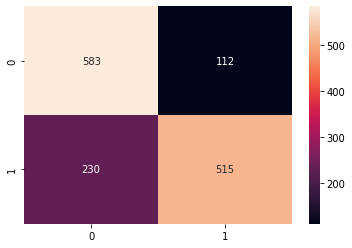


**** Plot ROC-AUC Curve ****


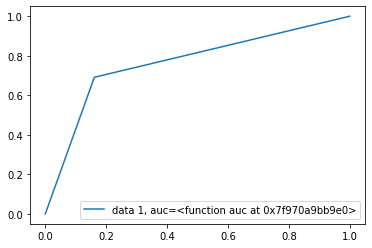

In [115]:
accuracy,precision,recall,f1,roc=get_metrics(Y_train,y_train_pred,y_test,y_test_pred)

In [116]:
score_board['D_tree']={'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1,'Roc_Score':roc}

In [155]:
eli5_explainability(D_tree.best_estimator_,2)

## Stacking

In [117]:
from sklearn.ensemble import StackingClassifier

In [118]:
estimators = [('lr',lr_best),
              ('svc',svm_best),('rf',rf_best),('gb',gb_best)
       ]

In [119]:
final_estimator = xgb_best

In [120]:
stacking=StackingClassifier(estimators=estimators,final_estimator=final_estimator,passthrough=True,n_jobs=-1)

In [121]:
stacking.fit(X_train,Y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=10,
                                                   class_weight='balanced')),
                               ('svc', SVC(C=100, kernel='poly')),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=100,
                                                       max_features='sqrt',
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       n_estimators=200)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=17,
                                                           min_samples_leaf=25,
    

In [122]:
y_train_pred=stacking.predict(X_train)
y_test_pred=stacking.predict(x_test)

**** Train Dataset Score ****
train_accuracy 0.9949050486336267
train_precision is 0.995774647887324
train_recall is 0.9939081537019682
train_f1 is 0.9948405253283303
train_roc is 0.9948936372905446

**** Test Dataset Score ****
test_accuracy is 0.8763888888888889
test_precision is 0.9212481426448736
test_recall is 0.8322147651006712
test_f1 is 0.8744710860366713
test_roc is 0.8779778861474579

**** Confusion Matrix on train set ****


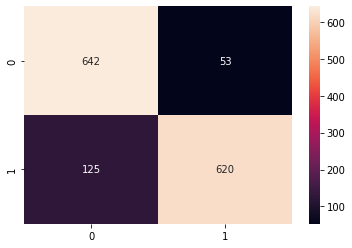


**** Plot ROC-AUC Curve ****


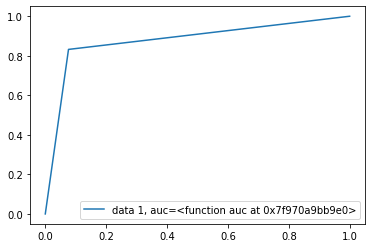

In [123]:
accuracy,precision,recall,f1,roc=get_metrics(Y_train,y_train_pred,y_test,y_test_pred)

In [124]:
score_board['Stacking']={'Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1_Score':f1,'Roc_Score':roc}

In [125]:
Finale_Score=pd.DataFrame(score_board)

In [126]:
Finale_Score=np.transpose(Finale_Score).reset_index().rename(columns={'index':'Model'})
Finale_Score

,Model,Accuracy,Precision,Recall,F1_Score,Roc_Score
0,Logistic,0.775694,0.890741,0.645638,0.748638,0.780373
1,SVM,0.784722,0.864322,0.692617,0.769001,0.788035
2,KNN,0.851389,0.854473,0.859060,0.856760,0.851113
3,Grad_boost,0.874306,0.897183,0.855034,0.875601,0.874999
4,XGB,0.883333,0.911555,0.857718,0.883817,0.884255
5,Random_Forest,0.843750,0.901235,0.783893,0.838478,0.845903
6,D_tree,0.762500,0.821372,0.691275,0.750729,0.765062
7,Stacking,0.876389,0.921248,0.832215,0.874471,0.877978


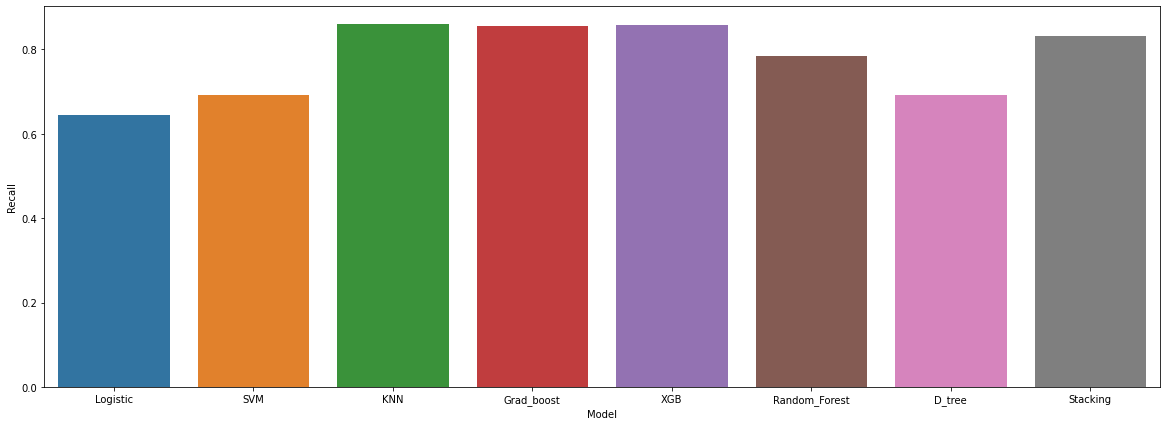

In [127]:
plt.figure(figsize = (20,7))
sns.barplot(x='Model',y='Recall',data=Finale_Score)